In [212]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
np.random.seed(1)
def skip(row):
    if row == 0: #preserve header
        return False
    return np.random.random() > 0.01
raw = pd.read_csv('NYPD_Complaint_Data_Historic.csv', skiprows=skip, header=0)
df = raw.copy()

In [ ]:
permit = pd.read_csv('DOB_Permit_Issuance.csv', skiprows=skip)

In [20]:
permit.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BRONX,2057680,707,EAST 211 STREET,220151564,1,A1,N,4657.0,51.0,...,NY,10960,2123705573,03/27/2019 12:00:00 AM,3609419,40.877769,-73.865463,12.0,380.0,Williamsbridge-Olinville
1,QUEENS,4056349,49-11,69TH STREET,440530454,1,A2,Y,2435.0,6.0,...,NY,11377,9179391488,03/27/2019 12:00:00 AM,3609271,40.737481,-73.895928,30.0,489.0,Elmhurst-Maspeth
2,BROOKLYN,3426467,664,KOSCIUSZKO STREET,321807167,1,A1,N,3252.0,9.0,...,NY,11211,9176240027,03/27/2019 12:00:00 AM,3608896,40.694336,-73.927408,34.0,393.0,Bushwick South
3,BROOKLYN,3028018,1000,DEAN STREET,340607301,1,A2,Y,1142.0,18.0,...,NY,11201,7184229999,03/27/2019 12:00:00 AM,3608807,40.677929,-73.957216,35.0,305.0,Crown Heights North
4,MANHATTAN,1006395,55,ST MARKS PLACE,123658951,1,A2,Y,450.0,47.0,...,NY,10003,9177104273,03/27/2019 12:00:00 AM,3608798,40.728179,-73.986658,2.0,38.0,East Village


In [5]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,467041873,04/01/2017,01:41:00,04/01/2017,01:48:00,62.0,04/01/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.619374,-74.001237,"(40.61937391, -74.00123696)",PATROL BORO BKLYN SOUTH,NaN,25-44,UNKNOWN,M
1,345946627,03/31/2017,23:30:00,04/01/2017,00:00:00,43.0,04/01/2017,578,HARRASSMENT 2,638.0,...,M,NaN,40.825419,-73.866221,"(40.825419359, -73.866220811)",PATROL BORO BRONX,NaN,45-64,BLACK,F
2,675560398,03/31/2017,00:45:00,04/01/2017,01:38:00,67.0,04/01/2017,346,ALCOHOLIC BEVERAGE CONTROL LAW,802.0,...,M,NaN,40.645870,-73.951952,"(40.645870305, -73.951952013)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
3,504874303,03/31/2017,22:00:00,03/31/2017,22:10:00,75.0,03/31/2017,578,HARRASSMENT 2,638.0,...,M,NaN,40.670938,-73.862702,"(40.670937865, -73.862702275)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F
4,712005664,03/31/2017,20:30:00,03/31/2017,21:24:00,19.0,03/31/2017,107,BURGLARY,213.0,...,M,NaN,40.761875,-73.966358,"(40.76187469, -73.966358084)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [72]:
nyc_coord = [40.713, -74.0071]
m = folium.Map(
    width=500, height=500,
    location=nyc_coord, zoom_start=12, 
    zoom_control=False,
    tiles='Stamen Toner',)
for i, r in df.sample(1000).iterrows():
    if np.isnan(r.Latitude):
        continue
    folium.Circle(
        radius=1,
        location=[r.Latitude, r.Longitude],
        color='crimson',
        fill=False,
        fill_opacity=0.3
    ).add_to(m)

m

In [12]:
df.shape

(60251, 35)

In [14]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [16]:
man = df[df.BORO_NM == 'MANHATTAN']

In [18]:
man.shape

(14535, 35)

In [21]:
man_permit = permit[permit.BOROUGH == 'MANHATTAN']

In [23]:
man_permit.shape

(14563, 60)

In [26]:
man['RPT_DT'] = pd.to_datetime(man['RPT_DT'])

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
report_by_year = man.groupby(man.RPT_DT.dt.year).count()['CMPLNT_NUM']

In [36]:
man_permit['date'] = pd.to_datetime(man_permit['Issuance Date'])

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
permit_by_year = man_permit.groupby(man_permit['date'].dt.year).count()['Lot']

In [45]:
counts = pd.concat([permit_by_year, report_by_year],axis=1).dropna()
counts.columns = ['permit', 'report']

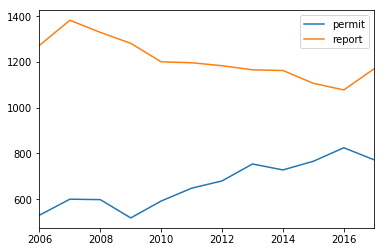

In [47]:
counts.plot()

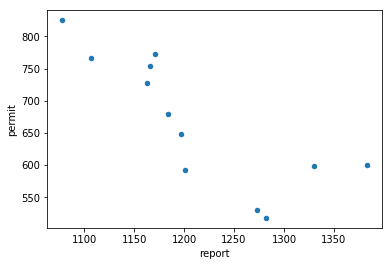

In [55]:
counts.plot.scatter('report', 'permit')

In [65]:
man.groupby('OFNS_DESC').count()['CMPLNT_NUM'].sort_values(ascending=False)

OFNS_DESC
PETIT LARCENY                     3130
GRAND LARCENY                     2051
HARRASSMENT 2                     1462
ASSAULT 3 & RELATED OFFENSES      1227
CRIMINAL MISCHIEF & RELATED OF    1129
DANGEROUS DRUGS                    881
OFF. AGNST PUB ORD SENSBLTY &      700
ROBBERY                            428
BURGLARY                           417
FELONY ASSAULT                     387
DANGEROUS WEAPONS                  297
OFFENSES AGAINST PUBLIC ADMINI     290
CRIMINAL TRESPASS                  239
MISCELLANEOUS PENAL LAW            226
INTOXICATED & IMPAIRED DRIVING     201
THEFT-FRAUD                        195
FORGERY                            177
SEX CRIMES                         167
VEHICLE AND TRAFFIC LAWS           130
FRAUDS                             122
GRAND LARCENY OF MOTOR VEHICLE     109
OFFENSES INVOLVING FRAUD           106
POSSESSION OF STOLEN PROPERTY       82
OFFENSES AGAINST THE PERSON         40
OTHER OFFENSES RELATED TO THEF      37
RAPE           

In [71]:
man[['RPT_DT','OFNS_DESC']].groupby(['OFNS_DESC', 'RPT_DT']).count()

Empty DataFrame
Columns: []
Index: [(ADMINISTRATIVE CODE, 2006-02-01 00:00:00), (ADMINISTRATIVE CODE, 2007-01-19 00:00:00), (ADMINISTRATIVE CODE, 2008-08-31 00:00:00), (ADMINISTRATIVE CODE, 2008-10-02 00:00:00), (ADMINISTRATIVE CODE, 2008-12-19 00:00:00), (ADMINISTRATIVE CODE, 2009-10-02 00:00:00), (ADMINISTRATIVE CODE, 2009-11-11 00:00:00), (ADMINISTRATIVE CODE, 2010-07-21 00:00:00), (ADMINISTRATIVE CODE, 2011-01-05 00:00:00), (ADMINISTRATIVE CODE, 2011-01-29 00:00:00), (ADMINISTRATIVE CODE, 2011-06-24 00:00:00), (ADMINISTRATIVE CODE, 2011-11-29 00:00:00), (ADMINISTRATIVE CODE, 2012-02-27 00:00:00), (ADMINISTRATIVE CODE, 2012-06-20 00:00:00), (ADMINISTRATIVE CODE, 2012-10-25 00:00:00), (ADMINISTRATIVE CODE, 2012-11-29 00:00:00), (ADMINISTRATIVE CODE, 2013-01-12 00:00:00), (ADMINISTRATIVE CODE, 2013-09-16 00:00:00), (ADMINISTRATIVE CODE, 2015-05-30 00:00:00), (ADMINISTRATIVE CODE, 2016-09-15 00:00:00), (ADMINISTRATIVE CODE, 2017-06-07 00:00:00), (ADMINISTRATIVE CODE, 2017-10-11 00:00:00), (ALCOHOLIC BEVERAGE CONTROL LAW, 2011-12-31 00:00:00), (ARSON, 2006-01-12 00:00:00), (ARSON, 2006-03-02 00:00:00), (ARSON, 2006-05-15 00:00:00), (ARSON, 2006-11-21 00:00:00), (ARSON, 2007-05-15 00:00:00), (ARSON, 2007-06-21 00:00:00), (ARSON, 2007-09-04 00:00:00), (ARSON, 2007-09-11 00:00:00), (ARSON, 2008-02-15 00:00:00), (ARSON, 2008-04-05 00:00:00), (ARSON, 2008-07-18 00:00:00), (ARSON, 2008-09-25 00:00:00), (ARSON, 2010-01-14 00:00:00), (ARSON, 2010-08-18 00:00:00), (ARSON, 2011-09-21 00:00:00), (ARSON, 2013-01-14 00:00:00), (ARSON, 2013-07-30 00:00:00), (ARSON, 2014-07-04 00:00:00), (ARSON, 2014-07-24 00:00:00), (ARSON, 2015-01-03 00:00:00), (ARSON, 2015-03-06 00:00:00), (ARSON, 2016-11-12 00:00:00), (ARSON, 2017-12-10 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-02 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-06 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-08 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-10 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-11 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-12 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-22 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-25 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-01-26 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-03 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-05 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-07 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-08 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-16 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-17 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-23 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-02-25 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-02 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-09 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-13 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-14 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-15 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-25 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-26 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-03-27 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-03 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-04 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-08 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-13 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-22 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-23 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-25 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-26 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-27 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-04-29 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-06 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-08 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-13 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-14 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-22 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-27 00:00:00), (ASSAULT 3 & RELATED OFFENSES, 2006-05-29 00:00:00), (ASSAULT 3 & RELATED OFFE

In [87]:
from uszipcode import SearchEngine, Zipcode

In [75]:
search = SearchEngine(simple_zipcode=True)

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [96]:
search.by_coordinates(df.iloc[0].Latitude, df.iloc[0].Longitude, radius=1, sort_by='dist')[0].zipcode

'11228'

In [98]:
man_permit.apply(lambda r: search.by_coordinates(r.Latitude, r.Longitude, radius=1, sort_by='dist')[0].zipcode, axis=1)

AttributeError: ("'Series' object has no attribute 'Latitude'", 'occurred at index 4')

In [101]:
man_permit=man_permit.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [105]:
man_permit['zipcode'] = man_permit.apply(lambda r: search.by_coordinates(r.LATITUDE, r.LONGITUDE, radius=2, sort_by='dist')[0].zipcode, axis=1)

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
man = man.dropna(subset=['Latitude', 'Longitude'])

In [112]:
man['zipcode'] = man.apply(lambda r: search.by_coordinates(r.Latitude, r.Longitude, radius=2, sort_by='dist')[0].zipcode, axis=1)

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [113]:
man_permit.groupby

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME,date,zipcode
4,MANHATTAN,1006395,55,ST MARKS PLACE,123658951,1,A2,Y,450.0,47.0,...,9177104273,03/27/2019 12:00:00 AM,3608798,40.728179,-73.986658,2.0,38.0,East Village,2019-03-26,10003
11,MANHATTAN,1031060,303,WEST 76 STREET,140838324,1,A2,Y,1185.0,66.0,...,2125959590,03/26/2019 12:00:00 AM,3608474,40.782560,-73.982960,6.0,163.0,Upper West Side,2019-03-25,10023
12,MANHATTAN,1018010,287,PARK AVENUE SOUTH,123086490,1,A2,N,878.0,1.0,...,6467914660,03/26/2019 12:00:00 AM,3608358,40.739685,-73.986720,2.0,68.0,Gramercy,2019-03-25,10003
13,MANHATTAN,1024727,1535,BROADWAY,123715168,1,A2,N,1017.0,7501.0,...,5167029195,03/26/2019 12:00:00 AM,3608270,40.758267,-73.985468,3.0,119.0,Midtown-Midtown South,2019-03-25,10020
14,MANHATTAN,1011761,140,CHARLES STREET,123704795,1,A2,N,631.0,7502.0,...,7185160012,03/26/2019 12:00:00 AM,3608215,40.734163,-74.007982,3.0,75.0,West Village,2019-03-25,10014
16,MANHATTAN,1052075,159,EAST 107 STREET,123371831,1,A2,N,1635.0,26.0,...,6464251888,03/23/2019 12:00:00 AM,3607908,40.792693,-73.945218,8.0,172.0,East Harlem South,2019-03-22,10029
17,MANHATTAN,1076173,1177,AVENUE OF THE AMERICAS,123450951,1,A2,N,998.0,29.0,...,2124900666,03/23/2019 12:00:00 AM,3607699,40.757256,-73.982364,4.0,119.0,Midtown-Midtown South,2019-03-22,10020
21,MANHATTAN,1003309,116,MADISON STREET,123291758,1,A2,N,276.0,31.0,...,9178063535,03/22/2019 12:00:00 AM,3606911,40.712246,-73.994943,1.0,8.0,Chinatown,2019-03-21,10038
25,MANHATTAN,1083869,55,EAST 52ND STREET,123664445,2,A2,Y,1288.0,27.0,...,2129406239,03/22/2019 12:00:00 AM,3606580,40.758828,-73.973978,4.0,102.0,Midtown-Midtown South,2019-03-21,10152
30,MANHATTAN,1053712,370,LENOX AVENUE,121230382,1,A2,N,1726.0,69.0,...,7183765400,03/21/2019 12:00:00 AM,3606032,40.810045,-73.943812,9.0,208.0,Central Harlem North-Polo Grounds,2019-03-20,10037


In [117]:
man['year'] = man.RPT_DT.dt.year

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
complaints_by_timeloc = man.groupby(['year', 'zipcode']).count()[['CMPLNT_NUM']].unstack()

In [138]:
man_permit['zipcode'] = man_permit['Zip Code']

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
man_permit['year'] = man_permit['date'].dt.year

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [266]:
permit_by_timeloc = man_permit.groupby(['year', 'zipcode']).count()[['Lot']].unstack()
permit_by_timeloc.fillna(0, inplace=True)
permit_by_timeloc = permit_by_timeloc['Lot']

complaints_by_timeloc = complaints_by_timeloc['CMPLNT_NUM']
complaints_by_timeloc.fillna(0, inplace=True)
permit_by_timeloc.columns = permit_by_timeloc.columns.to_native_types().astype(float).astype(int).astype(str)

zips = permit_by_timeloc.columns.intersection(complaints_by_timeloc.columns)
for z in zips:
    d = pd.concat([permit_by_timeloc[z], complaints_by_timeloc[z]], axis=1).dropna()
    d.columns=['permits', 'complaints']
    d.plot.scatter('permits', 'complaints', title=z)

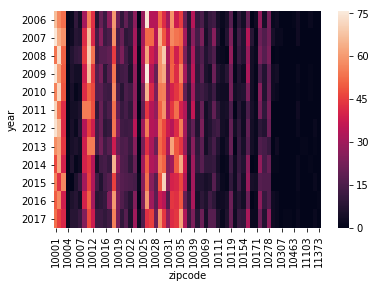

In [215]:
sns.heatmap(complaints_by_timeloc);

In [233]:
man_zips = complaints_by_timeloc.columns.union(permit_by_timeloc.columns)

man_zips = sorted(man_zips)

years = complaints_by_timeloc.index.intersection(permit_by_timeloc.index)

complaints_by_timeloc = complaints_by_timeloc.reindex(columns=man_zips).fillna(0)
complaints_by_timeloc = complaints_by_timeloc.loc[years]

permit_by_timeloc = permit_by_timeloc.reindex(columns=man_zips).fillna(0)
permit_by_timeloc = permit_by_timeloc.loc[years]

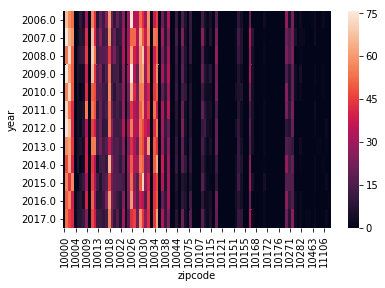

In [234]:
sns.heatmap(complaints_by_timeloc);

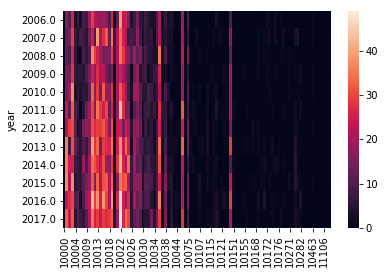

In [235]:
sns.heatmap(permit_by_timeloc);

In [250]:
a = complaints_by_timeloc.stack().to_frame().reset_index()
b = permit_by_timeloc.stack().to_frame().reset_index()

In [255]:
b.columns = ['year', 'zipcode', 'permit']
a.columns = ['year', 'zipcode', 'complaints']

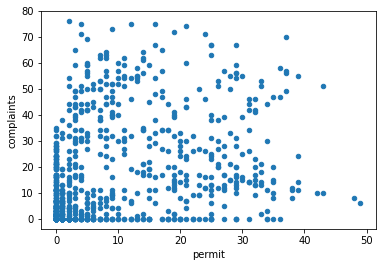

In [263]:
m = pd.merge(a,b,on=['year','zipcode'])
m.plot.scatter('permit', 'complaints')

In [265]:
m.corr()

,year,complaints,permit
year,1.000000,-0.039456,0.089818
complaints,-0.039456,1.000000,0.414574
permit,0.089818,0.414574,1.000000


In [249]:
b

,index,year,zipcode,permits
0,0,2006.0,10000,0.0
1,1,2006.0,10001,16.0
2,2,2006.0,10002,10.0
3,3,2006.0,10003,26.0
4,4,2006.0,10004,3.0
5,5,2006.0,10005,8.0
6,6,2006.0,10006,3.0
7,7,2006.0,10007,9.0
8,8,2006.0,10009,8.0
9,9,2006.0,10010,19.0
